[    0.  1600.  3200.  4800.  6400.  8000.  9600. 11200. 12800. 14400.
 16000. 17600. 19200. 20800. 22400. 24000. 25600. 27200. 28800. 30400.
 32000. 33600. 35200. 36800. 38400. 40000. 41600. 43200. 44800. 46400.
 48000. 49600. 51200. 52800. 54400. 56000. 57600. 59200. 60800. 62400.
 64000. 65600. 67200. 68800. 70400. 72000. 73600. 75200. 76800. 78400.
 80000. 81600. 83200.]
[    0.   560.  1120.  1680.  2240.  2800.  3360.  3920.  4480.  5040.
  5600.  6160.  6720.  7280.  7840.  8400.  8960.  9520. 10080. 10640.
 11200. 11760. 12320. 12880. 13440. 14000. 14560. 15120. 15680. 16240.
 16800. 17360. 17920. 18480. 19040. 19600. 20160. 20720. 21280. 21840.
 22400. 22960. 23520. 24080. 24640. 25200. 25760. 26320. 26880. 27440.
 28000. 28560. 29120. 29680. 30240. 30800. 31360. 31920. 32480. 33040.
 33600. 34160. 34720. 35280. 35840. 36400. 36960. 37520. 38080. 38640.
 39200. 39760. 40320. 40880. 41440. 42000. 42560. 43120. 43680. 44240.
 44800. 45360. 45920. 46480. 47040. 47600. 48160. 4872

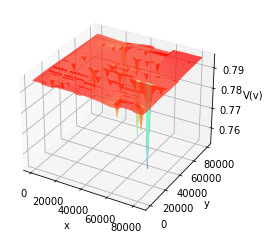

5
2


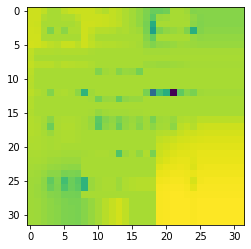

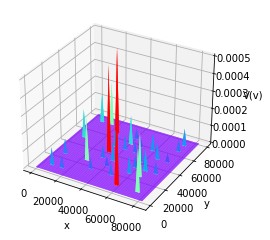

5
2
[    0.   640.  1280.  1920.  2560.  3200.  3840.  4480.  5120.  5760.
  6400.  7040.  7680.  8320.  8960.  9600. 10240. 10880. 11520. 12160.
 12800. 13440. 14080. 14720. 15360. 16000. 16640. 17280. 17920. 18560.
 19200. 19840. 20480. 21120. 21760. 22400. 23040. 23680. 24320. 24960.
 25600. 26240. 26880. 27520. 28160. 28800. 29440. 30080. 30720. 31360.
 32000. 32640. 33280. 33920. 34560. 35200. 35840. 36480. 37120. 37760.
 38400. 39040. 39680. 40320. 40960. 41600. 42240. 42880. 43520. 44160.
 44800. 45440. 46080. 46720. 47360. 48000. 48640. 49280. 49920. 50560.
 51200. 51840. 52480. 53120. 53760. 54400. 55040. 55680. 56320. 56960.
 57600. 58240. 58880. 59520. 60160. 60800. 61440. 62080. 62720. 63360.
 64000. 64640. 65280. 65920. 66560. 67200. 67840. 68480. 69120. 69760.
 70400. 71040. 71680. 72320. 72960. 73600. 74240. 74880. 75520. 76160.
 76800. 77440. 78080. 78720. 79360. 80000. 80640. 81280. 81920. 82560.
 83200. 83840.]
[    0.   336.   560.   672.  1008.  1120.  1344.  1680. 

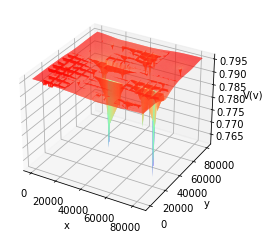

11
5


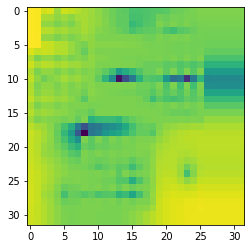

In [25]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import numpy as np
import math
from pylab import *
#matplotlib.use('WXAgg')

def readin(filename):
  data = []
  with open(filename, 'r') as file_to_read:
    while True:
      lines = file_to_read.readline() 
      if not lines:
        break
        pass
      lines = [float(i) for i in lines.split()]
      data.append(lines) 
      pass
    data = np.array(data) 

  return data

def readincurrent(filename):
  data = []
  with open(filename, 'r') as file_to_read:
    while True:
      lines = file_to_read.readline() 
      if not lines:
        break
        pass
      lines = [float(i) for i in lines.split()]
      data.append(lines)
      pass
  data = np.array(data) 
  return data

def transferdata(data):
  metal = 2
  power = 0.8
  X = []
  Y = []
  Z = []
  x = []
  y = []
  z = []

  for i in(range(data.shape[0])):
    if data[i][2] == metal and  data[i][4] == power:
       X.append(data[i][0])
       Y.append(data[i][1])
       Z.append(data[i][3])
       if data[i][0] not in x:
         x.append(data[i][0])
         #print(x)
       if data[i][1] not in y:
         y.append(data[i][1])
  X = np.array(X)
  Y = np.array(Y)
  Z = np.array(Z)    
  x1 = np.sort(x)
  y1 = np.sort(y)
  line_x = np.array(x1)
  line_y  = np.array(y1)
  print(line_x)
  print(line_y)

  Xmesh, Ymesh = np.meshgrid(line_x, line_y)
  #print(Xmesh)
  #print(Ymesh)
  #z = -np.ones(Xmesh.shape)
  z = np.mean(Z)*np.ones(Xmesh.shape)
  for k in(range(X.shape[0])):
    xindex=0
    yindex=0
    for i in(range(line_x.shape[0])):
        if X[k]==line_x[i]:
            xindex=i
            break
    for j in(range(line_y.shape[0])):
        if Y[k]==line_y[j]:
            yindex=j
            break
    z[yindex][xindex]=Z[k]

  '''  
  for i in range(z.shape[0]):
    non_zero = 0
    for j in range(z.shape[1]):
        if z[i][j]==-1:
            z[i][j] = non_zero
        else:
            non_zero=z[i][j]

  non_zero = np.mean(z)
  for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z[i][j]==0:
            z[i][j] = non_zero
  '''        
  return Xmesh,Ymesh,z,line_x,line_y

def transfercurrent(data,line_x,line_y):
  metal = 2
  #metal2 = 6
  power = 0.8
  #print(data.shape)
  X = []
  Y = []
  Z = []
  x = []
  y = []
  z = []

  for i in(range(data.shape[0])):
    
       X.append(data[i][0])
       Y.append(data[i][1])
       Z.append(data[i][4])

  X = np.array(X)
  Y = np.array(Y)
  Z = np.array(Z)    

  Xmesh, Ymesh = np.meshgrid(line_x, line_y)
  #print(Xmesh)
  #print(Ymesh)
  z = np.zeros(Xmesh.shape)

  for k in(range(X.shape[0])):
    xindex=0
    yindex=0
    for i in(range(line_x.shape[0])):
        absx=abs(X[k] -line_x)
        absx = list(absx)
        xindex=absx.index(min(absx))
        break
    for j in(range(line_y.shape[0])):
        absy=abs(Y[k]-line_y)
        absy= list(absy)
        yindex=absy.index(min(absy))
        break
    z[yindex][xindex]=Z[k]

  return Xmesh,Ymesh,z

def checkz(z):
    print(z.shape)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            if z[i][j]==0:
               print(i,j)

def plotresult(Xmesh,Ymesh,z):
  fig = plt.figure()
  #ax1 =plt.subplot(2,1,1)
  ax1 = fig.gca(projection='3d')
  #X, Y, Z = axes3d.get_test_data(0.05)
  #ax1.plot_surface(Xmesh, Ymesh, z, rstride=1, cstride=1)
  ax1.plot_surface(Xmesh, Ymesh, z, rstride=1, cstride=1, cmap=cm.rainbow)
  #cset = ax1.contour(Xmesh, Ymesh, z, zdir='z', offset=0.7, cmap=cm.rainbow)
  #cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
  #cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)
  '''
  font1 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 20}
  plt.tick_params(labelsize=20)
  x = range(0,120000,30000)
  plt.xticks(x,rotation=20)
  y = range(0,80000,20000)
  plt.yticks(y,rotation=-20)
  #ax1.set_xlabel('X',font1)
  ax1.set_xlim(0, 100000)
  #ax1.set_ylabel('Y',font1)
  ax1.set_ylim(0, 60000)
  #ax1.set_zlabel('   mV',font1)
  ax1.set_zlim(0.7, 0.8)
  #fig.savefig('demo.png', bbox_inches='tight')
  '''
  #plt.figure()
  #fig.savefig('demo.png', bbox_inches='tight')
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')
  ax1.set_zlabel('V(v)')
  plt.show()

# coding=gbk
from PIL import Image
import numpy as np
# import scipy
import matplotlib.pyplot as plt

def ImageToMatrix(filename):
    im = Image.open(filename)
    width,height = im.size
    im = im.convert("L") 
    data = im.getdata()
    data = np.matrix(data,dtype='float')/255.0
    new_data = np.reshape(data,(width,height))
    return new_data

def MatrixToImage(data):
    data = data*255
    new_im = Image.fromarray(data.astype(np.uint8))
    return new_im
    
def resizeresult(z):
  d = 32
  Z=np.zeros((d,d))
  x_d,y_d = z.shape[0],z.shape[1]
  x_incre=int(ceil(x_d/d))
  y_incre=int(ceil(y_d/d))
  print(x_incre)
  print(y_incre)
  for i in(range(d)):
    for j in(range(d)):
      Z[i][j]=np.mean(z[min(x_d-1,i*x_incre):min((i+1)*x_incre,x_d),min(y_d-1,j*y_incre):min((j+1)*y_incre,y_d)])
      #print(np.mean(z[min(x_d-1,i*x_incre):min((i+1)*x_incre,x_d),min(y_d-1,j*y_incre):min((j+1)*y_incre,y_d)]))             
  return Z

data=readin('../IR_drop.txt')
Xmesh,Ymesh,z,line_x,line_y=transferdata(data)
#print(Xmesh)
#print(Ymesh)
#print(z)
checkz(z)
print(np.min(z))
print(np.mean(z))
plotresult(Xmesh,Ymesh,z)
Z_matrix=resizeresult(z)
#print(Z_matrix)
plt.imshow(Z_matrix, interpolation='nearest')
#plt.imshow(Z_matrix, cmap = plt.cm.gray_r)
Z_image=MatrixToImage(Z_matrix)

data=readin('../InputCurrent_initial.txt')
Xmesh,Ymesh,z=transfercurrent(data,line_x,line_y)
plotresult(Xmesh,Ymesh,z)
Z_matrix=resizeresult(z)
Z_image=MatrixToImage(Z_matrix)

data=readin('../IR_drop_3C.txt')
Xmesh,Ymesh,z,line_x,line_y=transferdata(data)
checkz(z)
print(np.min(z))
print(np.mean(z))
plotresult(Xmesh,Ymesh,z)
Z_matrix=resizeresult(z)
#print(Z_matrix)
plt.imshow(Z_matrix, interpolation='nearest')
#plt.imshow(Z_matrix, cmap = plt.cm.gray_r)
Z_image=MatrixToImage(Z_matrix)



In [34]:
def read_hpisce_result(filename):
  data = []
  with open(filename, 'r') as file_to_read:
    index = 0
    while True:
      lines = file_to_read.readline()
      if not lines:
        break
        pass
      try:
        if index>=12:
          line = lines.split()
          position = line[1].split('_')
          result=[]
          if position[0]=='n':
              result.append(position[2])
              result.append(position[3])
              result.append(position[1])
              result.append(line[3])
              if position[4]=="v":
                result.append(0.8)
              else:
                result.append(0)
              data.append(result)
          else:
              result.append(position[1])
              result.append(position[2])
              result.append(position[0])
              result.append(line[3])
              if position[3]=="v":
                result.append(0.8)
              else:
                result.append(0)
              data.append(result)
      except:
        #print('error for ',lines)
        pass
      index = index + 1
  return np.array(data)

filename = '../test.ic0'
data=read_hpisce_result(filename)

In [41]:
def write_out_txt(data,txt_filename):
  file_to_write = open(txt_filename, "w")
  for i in range(len(data)):
    for j in range(len(data[i])):
       file_to_write.write(str(data[i][j]))
       file_to_write.write(" ")
    file_to_write.write('\n')
  file_to_write.close()

In [42]:
txt_filename="../IR_drop_hspice.txt"
write_out_txt(data,txt_filename)

83520.0
[    0.  1600.  3200.  4800.  6400.  8000.  9600. 11200. 12800. 14400.
 16000. 17600. 19200. 20800. 22400. 24000. 25600. 27200. 28800. 30400.
 32000. 33600. 35200. 36800. 38400. 40000. 41600. 43200. 44800. 46400.
 48000. 49600. 51200. 52800. 54400. 56000. 57600. 59200. 60800. 62400.
 64000. 65600. 67200. 68800. 70400. 72000. 73600. 75200. 76800. 78400.
 80000. 81600. 83200.]
[    0.   560.  1120.  1680.  2240.  2800.  3360.  3920.  4480.  5040.
  5600.  6160.  6720.  7280.  7840.  8400.  8960.  9520. 10080. 10640.
 11200. 11760. 12320. 12880. 13440. 14000. 14560. 15120. 15680. 16240.
 16800. 17360. 17920. 18480. 19040. 19600. 20160. 20720. 21280. 21840.
 22400. 22960. 23520. 24080. 24640. 25200. 25760. 26320. 26880. 27440.
 28000. 28560. 29120. 29680. 30240. 30800. 31360. 31920. 32480. 33040.
 33600. 34160. 34720. 35280. 35840. 36400. 36960. 37520. 38080. 38640.
 39200. 39760. 40320. 40880. 41440. 42000. 42560. 43120. 43680. 44240.
 44800. 45360. 45920. 46480. 47040. 47600. 481

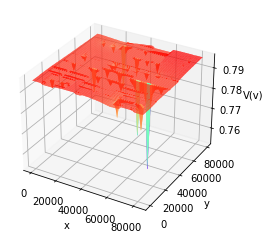

In [21]:
data_h=readin('../IR_drop_hspice.txt')
print(np.max(data_h[:,0]))
#print(Xmesh)
#print(Ymesh)
Xmesh_h,Ymesh_h,z_h,line_x_h,line_y_h=transferdata(data_h)
#print('hspice',z_h[62,45])
#print(z_h)
checkz(z_h)
#print(np.min(z_h))
#print(np.mean(z_h))
plotresult(Xmesh_h,Ymesh_h,z_h)
#Z_matrix=resizeresult(z_h)
#print(Z_matrix)
#plt.imshow(Z_matrix, interpolation='nearest')
#plt.imshow(Z_matrix, cmap = plt.cm.gray_r)
#Z_image=MatrixToImage(Z_matrix)

[    0.  1600.  3200.  4800.  6400.  8000.  9600. 11200. 12800. 14400.
 16000. 17600. 19200. 20800. 22400. 24000. 25600. 27200. 28800. 30400.
 32000. 33600. 35200. 36800. 38400. 40000. 41600. 43200. 44800. 46400.
 48000. 49600. 51200. 52800. 54400. 56000. 57600. 59200. 60800. 62400.
 64000. 65600. 67200. 68800. 70400. 72000. 73600. 75200. 76800. 78400.
 80000. 81600. 83200.]
[    0.   560.  1120.  1680.  2240.  2800.  3360.  3920.  4480.  5040.
  5600.  6160.  6720.  7280.  7840.  8400.  8960.  9520. 10080. 10640.
 11200. 11760. 12320. 12880. 13440. 14000. 14560. 15120. 15680. 16240.
 16800. 17360. 17920. 18480. 19040. 19600. 20160. 20720. 21280. 21840.
 22400. 22960. 23520. 24080. 24640. 25200. 25760. 26320. 26880. 27440.
 28000. 28560. 29120. 29680. 30240. 30800. 31360. 31920. 32480. 33040.
 33600. 34160. 34720. 35280. 35840. 36400. 36960. 37520. 38080. 38640.
 39200. 39760. 40320. 40880. 41440. 42000. 42560. 43120. 43680. 44240.
 44800. 45360. 45920. 46480. 47040. 47600. 48160. 4872

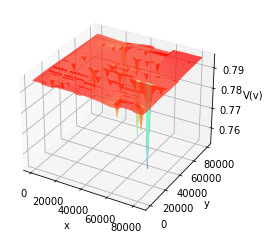

In [22]:
data=readin('../IR_drop.txt')
Xmesh,Ymesh,z,line_x,line_y=transferdata(data)
print('superlu',z[62,45])
#print(Xmesh)
#print(Ymesh)
#print(z)
checkz(z)
print(np.min(z))
print(np.mean(z))
plotresult(Xmesh,Ymesh,z)
#Z_matrix=resizeresult(z)
#print(Z_matrix)
#plt.imshow(Z_matrix, interpolation='nearest')
#plt.imshow(Z_matrix, cmap = plt.cm.gray_r)
#Z_image=MatrixToImage(Z_matrix)

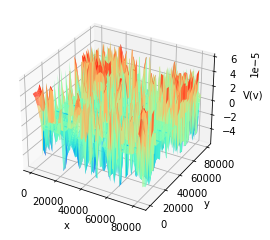

-1.249043273539085e-06
6.100000000008876e-05
-5.899999999992023e-05


In [23]:
z_detal = z -z_h
plotresult(Xmesh,Ymesh,z_detal)
print(np.mean(z_detal))
print(np.max(z_detal))
print(np.min(z_detal))

In [94]:
print(data.shape)
print(data[0])    

(100610, 5)
[0.         0.         3.         0.00452303 0.        ]


In [ ]:
print(data_h.shape)
print(data_h[0])

set_data = set(data_h)

In [96]:
def sort_data(data,data_h):
    new_data_h=[]
    for i in range(data.shape[0]):
        for j in range(data_h.shape[0]):
            if data[i][0]==data_h[j][0] and data[i][1]==data_h[j][1] and data[i][2]==data_h[j][2] and data[i][4]==data_h[j][4]:
                new_data_h.append(data_h[j])
                break
    return np.array(new_data_h)

In [ ]:
new_data_h=sort_data(data,data_h)